In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
sns.set(rc={'figure.figsize':(20,8.27)})

### 1.1 Приведем таблицу в более удобный вид

In [2]:
unique_a = pd.read_excel('unique_a.xlsx')
totals_a = pd.read_excel('totals_a.xlsx')
totals_b = pd.read_excel('totals_b.xlsx')
totals_c = pd.read_excel('totals_c.xlsx')
totals_d = pd.read_excel('totals_d.xlsx')
time = pd.read_excel('time.xlsx')

In [3]:
unique_a

,formula,segment,level_number,2021-03-31 to 2021-06-29
0,\tFormula A: UNIQUES(A),\tCohort A,1,5057
1,\tFormula A: UNIQUES(A),\tCohort A,2,4724
2,\tFormula A: UNIQUES(A),\tCohort A,3,4363
3,\tFormula A: UNIQUES(A),\tCohort A,4,3925
4,\tFormula A: UNIQUES(A),\tCohort A,5,3590
...,...,...,...,...
235,\tFormula A: UNIQUES(A),\tCohort B,111,340
236,\tFormula A: UNIQUES(A),\tCohort B,118,316
237,\tFormula A: UNIQUES(A),\tCohort B,119,313
238,\tFormula A: UNIQUES(A),\tCohort B,116,320


In [4]:
totals_a

,formula,segment,level_number,2021-03-31 to 2021-06-29
0,\tFormula B: TOTALS(A),\tCohort A,1,5131
1,\tFormula B: TOTALS(A),\tCohort A,2,4759
2,\tFormula B: TOTALS(A),\tCohort A,3,4464
3,\tFormula B: TOTALS(A),\tCohort A,4,4011
4,\tFormula B: TOTALS(A),\tCohort A,5,3739
...,...,...,...,...
235,\tFormula B: TOTALS(A),\tCohort B,116,412
236,\tFormula B: TOTALS(A),\tCohort B,101,411
237,\tFormula B: TOTALS(A),\tCohort B,105,391
238,\tFormula B: TOTALS(A),\tCohort B,111,381


In [5]:
totals_b

,formula,segment,level_number,2021-03-31 to 2021-06-29
0,\tFormula C: TOTALS(B),\tCohort A,1,4902
1,\tFormula C: TOTALS(B),\tCohort A,2,4600
2,\tFormula C: TOTALS(B),\tCohort A,3,4175
3,\tFormula C: TOTALS(B),\tCohort A,4,3851
4,\tFormula C: TOTALS(B),\tCohort A,5,3480
...,...,...,...,...
235,\tFormula C: TOTALS(B),\tCohort B,116,321
236,\tFormula C: TOTALS(B),\tCohort B,117,319
237,\tFormula C: TOTALS(B),\tCohort B,118,317
238,\tFormula C: TOTALS(B),\tCohort B,119,313


In [6]:
totals_c

,formula,segment,level_number,2021-03-31 to 2021-06-29
0,\tFormula D: TOTALS(C),\tCohort A,15,1200
1,\tFormula D: TOTALS(C),\tCohort A,69,1190
2,\tFormula D: TOTALS(C),\tCohort A,54,1041
3,\tFormula D: TOTALS(C),\tCohort A,29,1005
4,\tFormula D: TOTALS(C),\tCohort A,68,884
...,...,...,...,...
232,\tFormula D: TOTALS(C),\tCohort B,23,11
233,\tFormula D: TOTALS(C),\tCohort B,16,6
234,\tFormula D: TOTALS(C),\tCohort B,21,3
235,\tFormula D: TOTALS(C),\tCohort B,30,1


#### В таблице totals_c не хватает данных о трех уровнях, попробую заполнить

In [7]:
totals_d

,formula,segment,level_number,2021-03-31 to 2021-06-29
0,\tFormula E: TOTALS(D),\tCohort A,1,464
1,\tFormula E: TOTALS(D),\tCohort A,5,277
2,\tFormula E: TOTALS(D),\tCohort A,15,248
3,\tFormula E: TOTALS(D),\tCohort A,3,223
4,\tFormula E: TOTALS(D),\tCohort A,19,222
...,...,...,...,...
235,\tFormula E: TOTALS(D),\tCohort B,33,25
236,\tFormula E: TOTALS(D),\tCohort B,112,25
237,\tFormula E: TOTALS(D),\tCohort B,101,24
238,\tFormula E: TOTALS(D),\tCohort B,105,20


In [8]:
time

,formula,segment,level_number,2021-03-31 to 2021-06-29
0,Formula F: TIME,\tCohort A,1,180
1,Formula F: TIME,\tCohort A,2,180
2,Formula F: TIME,\tCohort A,3,205
3,Formula F: TIME,\tCohort A,4,250
4,Formula F: TIME,\tCohort A,5,210
...,...,...,...,...
235,Formula F: TIME,\tCohort B,116,281
236,Formula F: TIME,\tCohort B,117,328
237,Formula F: TIME,\tCohort B,118,323
238,Formula F: TIME,\tCohort B,119,282


In [9]:
totals_c.level_number.value_counts()

120    2
46     2
34     2
35     2
36     2
      ..
86     2
87     2
88     2
2      2
33     1
Name: level_number, Length: 119, dtype: int64

In [10]:
totals_c.segment.value_counts()

\tCohort B    119
\tCohort A    118
Name: segment, dtype: int64

In [11]:
totals_c[totals_c['level_number'] == 1]

,formula,segment,level_number,2021-03-31 to 2021-06-29


#### Нет информации о проигрышах на первом уровне. Скорее всего этот уровень очень легкий или обучающий, так что заполню его нулями.

In [12]:
totals_c[totals_c['level_number'] == 33]

,formula,segment,level_number,2021-03-31 to 2021-06-29
236,\tFormula D: TOTALS(C),\tCohort B,33,1


#### Нет информации о проигрышах на 33 уровне в когорте А.  По-хорошему, этот момент следовало бы уточнить у тех, кто эту таблицу собирал, но мне пока уточнять особо не у кого, так что буду считать, что раз в когорте В уровень был легким(всего один проигрыш), то и в когорте А он был легким. Заполню нулем

In [13]:
totals_c = totals_c.append(
    [{'formula' : ' \tFormula D: TOTALS(C)', 'segment' : '\tCohort A', 'level_number' : 1, '2021-03-31 to 2021-06-29' : 0},
    {'formula' : ' \tFormula D: TOTALS(C)', 'segment' : '\tCohort B', 'level_number' : 1, '2021-03-31 to 2021-06-29' : 0},
    {'formula' : ' \tFormula D: TOTALS(C)', 'segment' : '\tCohort A', 'level_number' : 33, '2021-03-31 to 2021-06-29' : 0}],
    ignore_index=True
)

In [14]:
def cleaner(dataframe):
    dataframe.drop('formula', axis=1, inplace=True)
    dataframe['segment'] = dataframe['segment'].str.strip()
    dataframe.sort_values(by=['level_number', 'segment'], inplace=True)
    dataframe.reset_index(drop=True, inplace=True)

In [15]:
dataframes = [unique_a, totals_a, totals_b, totals_c, totals_d, time]
for dataframe in dataframes:
    cleaner(dataframe)

In [16]:
dataframe_names = ['unique_a', 'totals_a', 'totals_b', 'totals_c', 'totals_d', 'time']
for i in range(6):
    dataframes[i].rename(columns={'2021-03-31 to 2021-06-29' : dataframe_names[i]}, inplace=True)

In [17]:
unique_a

,segment,level_number,unique_a
0,Cohort A,1,5057
1,Cohort B,1,5196
2,Cohort A,2,4724
3,Cohort B,2,4801
4,Cohort A,3,4363
...,...,...,...
235,Cohort B,118,316
236,Cohort A,119,319
237,Cohort B,119,313
238,Cohort A,120,315


In [18]:
totals_a

,segment,level_number,totals_a
0,Cohort A,1,5131
1,Cohort B,1,5272
2,Cohort A,2,4759
3,Cohort B,2,4845
4,Cohort A,3,4464
...,...,...,...
235,Cohort B,118,562
236,Cohort A,119,754
237,Cohort B,119,607
238,Cohort A,120,445


In [19]:
totals_b

,segment,level_number,totals_b
0,Cohort A,1,4902
1,Cohort B,1,4995
2,Cohort A,2,4600
3,Cohort B,2,4629
4,Cohort A,3,4175
...,...,...,...
235,Cohort B,118,317
236,Cohort A,119,318
237,Cohort B,119,313
238,Cohort A,120,316


In [20]:
totals_c

,segment,level_number,totals_c
0,Cohort A,1,0
1,Cohort B,1,0
2,Cohort A,2,12
3,Cohort B,2,13
4,Cohort A,3,72
...,...,...,...
235,Cohort B,118,222
236,Cohort A,119,401
237,Cohort B,119,258
238,Cohort A,120,94


In [21]:
totals_d

,segment,level_number,totals_d
0,Cohort A,1,464
1,Cohort B,1,493
2,Cohort A,2,147
3,Cohort B,2,157
4,Cohort A,3,223
...,...,...,...
235,Cohort B,118,64
236,Cohort A,119,100
237,Cohort B,119,99
238,Cohort A,120,58


In [22]:
time

,segment,level_number,time
0,Cohort A,1,180
1,Cohort B,1,185
2,Cohort A,2,180
3,Cohort B,2,180
4,Cohort A,3,205
...,...,...,...
235,Cohort B,118,323
236,Cohort A,119,273
237,Cohort B,119,282
238,Cohort A,120,300


In [23]:
data = reduce(lambda  left,right: pd.merge(left,right), dataframes)

In [24]:
data

,segment,level_number,unique_a,totals_a,totals_b,totals_c,totals_d,time
0,Cohort A,1,5057,5131,4902,0,464,180
1,Cohort B,1,5196,5272,4995,0,493,185
2,Cohort A,2,4724,4759,4600,12,147,180
3,Cohort B,2,4801,4845,4629,13,157,180
4,Cohort A,3,4363,4464,4175,72,223,205
...,...,...,...,...,...,...,...,...
235,Cohort B,118,316,562,317,222,64,323
236,Cohort A,119,319,754,318,401,100,273
237,Cohort B,119,313,607,313,258,99,282
238,Cohort A,120,315,445,316,94,58,300


In [25]:
data.to_excel("data.xlsx")  

### 1.2 Для каждого уровня в обеих когортах посчитаю процент отвала игроков

In [26]:
data_A = (data[data['segment'] == 'Cohort A']).reset_index(drop=True)
data_B = (data[data['segment'] == 'Cohort B']).reset_index(drop=True)

In [27]:
churn_rate_A = np.zeros(120)
churn_rate_B = np.zeros(120)

# показывает отток на следующем уровне
for i in range(119):
    churn_rate_A[i] = np.round((data_A.unique_a[i] - data_A.unique_a[i+1]) / data_A.unique_a[i] * 100, 2) 
    churn_rate_B[i] = np.round((data_B.unique_a[i] - data_B.unique_a[i+1]) / data_B.unique_a[i] * 100, 2)

data_A['churn_rate'] = churn_rate_A
data_B['churn_rate'] = churn_rate_B

In [28]:
churn_rate_A

array([ 6.58,  7.64, 10.04,  8.54,  7.1 ,  4.35,  6.11,  7.05,  6.39,
        7.37,  2.98,  4.06,  4.76,  3.36,  6.91,  2.13,  1.96,  2.87,
        4.74,  5.27,  1.91,  1.39,  1.28,  1.29,  2.36,  1.88,  3.21,
        3.89,  3.75,  5.5 ,  0.89,  3.59,  0.51,  2.21,  1.74,  0.71,
        0.98,  1.62,  1.46,  1.95,  1.52,  1.54,  1.86,  1.09,  1.31,
        3.16,  2.63,  1.51,  1.21,  1.56,  0.68,  2.27,  1.63,  3.78,
        1.11,  1.49,  1.77,  1.28,  1.17,  3.29,  1.22,  0.55,  2.49,
        0.71,  2.58,  0.73,  0.89,  2.39,  4.59,  2.56,  2.14,  1.51,
        1.02,  1.03,  1.57,  1.24,  2.69,  0.74,  0.74,  1.5 ,  0.95,
        1.72,  1.56,  1.58,  2.21,  1.23,  0.21,  2.51,  2.57,  0.66,
        1.99,  1.35,  2.06,  1.4 ,  0.71,  0.72,  1.92,  2.21,  1.  ,
        1.27,  1.03,  1.3 ,  2.36,  0.81,  1.08,  0.82,  0.83,  0.28,
        2.23,  0.86,  0.58,  0.29,  1.74,  0.59,  1.19,  0.9 ,  0.61,
        2.45,  1.25,  0.  ])

Text(0, 0.5, 'churn_rate')

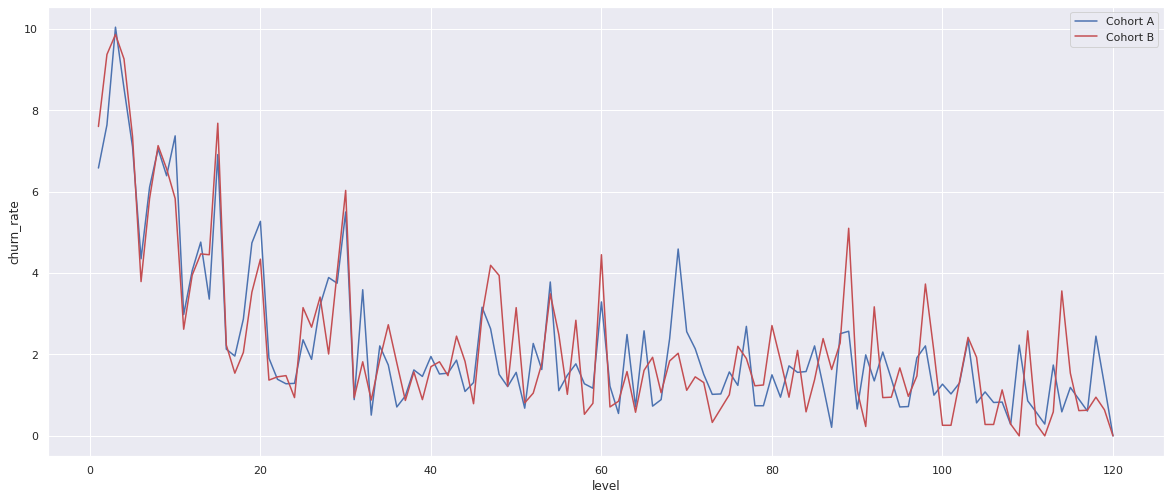

In [29]:
plt.plot(np.array(data_A.level_number), churn_rate_A, label='Cohort A')
plt.plot(np.array(data_B.level_number), churn_rate_B, label='Cohort B', c='r')
plt.legend(loc='upper right')
plt.xlabel('level')
plt.ylabel('churn_rate')

### 1.3 Какие еще сведения способные улучшить игру можно получить из этих данных?

#### Можно пытаться отлавливать большую разницу отвала на отдельных уровнях и исходя из нее выбирать более правильный баланс на конкретном уровне:

In [30]:
levels_churn = []
for i in range(120):
    if np.abs(churn_rate_A[i] - churn_rate_B[i]) > 2.5:
        levels_churn.append(i+1)

In [31]:
levels_churn

[69, 89, 114]

#### Можно обратить внимание на разницу числа проигрышей. Если она большая, можно полагать, что уровень в одной из когорт стал слишком сложным/легким, и если человек не фанат Dark Souls/Веселой фермы, он может психануть/заскучать и удалить игру.

In [32]:
levels_losed = []
for i in range(120):
    if np.abs(data_A.totals_c[i] - data_B.totals_c[i]) > 500:
        levels_losed.append(i+1)

In [33]:
levels_losed

[28, 32, 61, 66, 82, 110, 120]

#### То же самое можно сделать со временем, затрачиваемым на уровень

### 1.4 Какая из версий балансов уровней перспективней?

#### Я погуглил, как можно сравнивать оттоки для двух когорт, чтобы сделать сомнительный вывод, на какой когорте лучше результат, но как-то все безуспешно. Поэтому я не придумал ничего лучше, чем их сложить. С этой точки зрения баланс в когорте А чуть лучше.

In [34]:
churn_rate_A.sum()

272.11

In [35]:
churn_rate_B.sum()

275.68

Text(0, 0.5, 'normed amount of unique players')

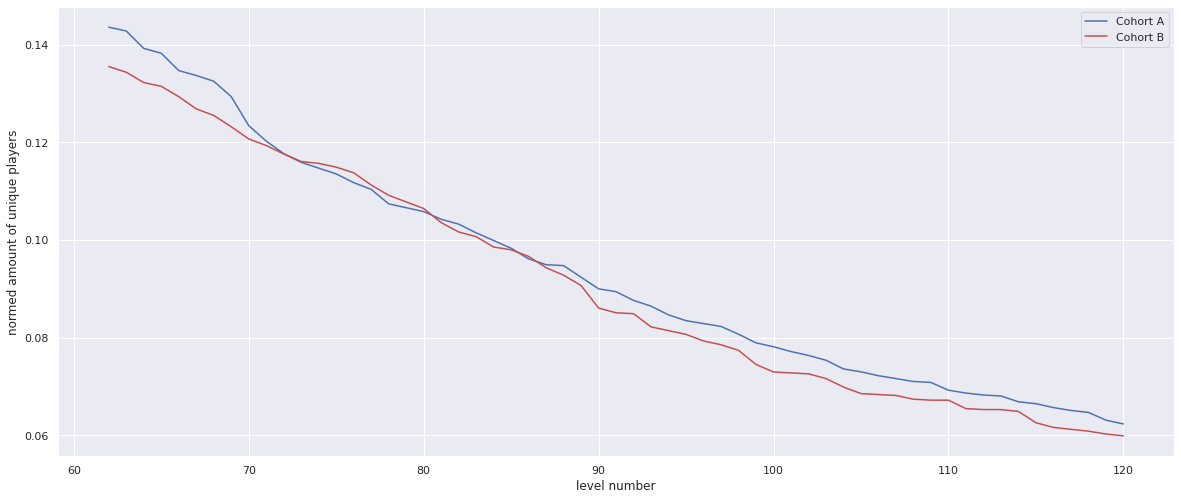

In [36]:
plt.plot(data_A.level_number[61:], data_A.unique_a[61:] / 5057, label='Cohort A')
plt.plot(data_B.level_number[61:], data_B.unique_a[61:] / 5196, label='Cohort B', c='r')
plt.legend(loc='upper right')
plt.xlabel('level number')
plt.ylabel('normed amount of unique players')

In [37]:
round(data_A.unique_a[119] / data_A.unique_a[0] * 100, 2)

6.23

In [38]:
round(data_B.unique_a[119] / data_B.unique_a[0] * 100, 2)

5.99

#### Больший процент людей остался в когорте А, что тоже говорит в ее пользу, так что буду считать, что она лучшая

### 2.1 Основываясь на данных из таблицы, спрогнозирую для лучшей когорты, какой процент пользователей дойдет до 240, 360, 480, 600 уровня.

Text(0, 0.5, 'percent')

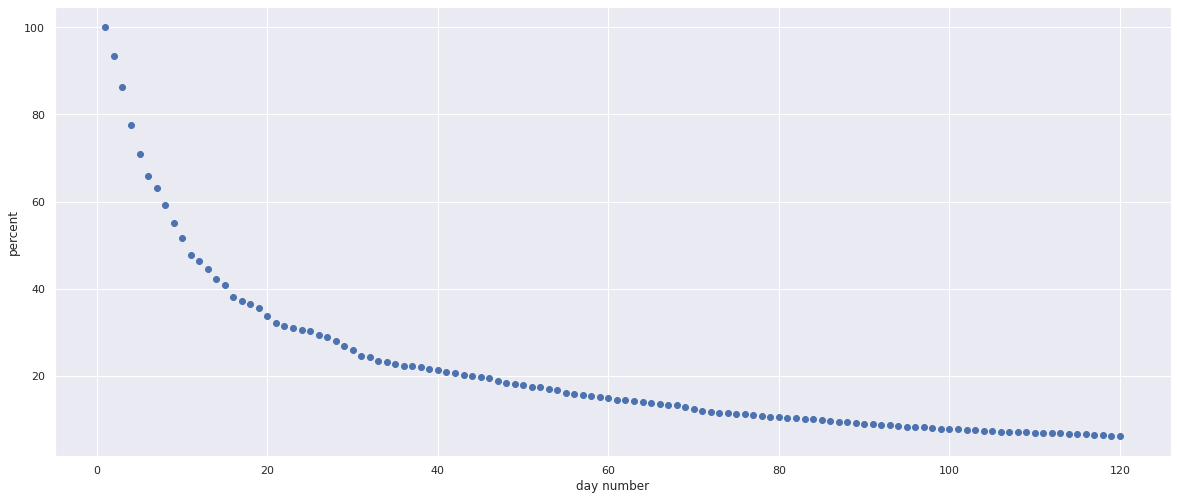

In [39]:
plt.scatter(data_A.level_number, data_A.unique_a / 5057 * 100)
plt.xlabel('day number')
plt.ylabel('percent')

#### Видно, что зависимость экспоненциальная, поэтому буду приближать ее экспонентой. Т.к. интересуют прогнозы на высоких уровнях, буду обучать и тестировать модель только на второй половине уровней.

$ y = A \times \exp(B \times x)$

$ \ln(y) = \ln(A) + Bx $

#### То есть после такой линеаризации можно использовать линейную регрессию, а потом взять экспоненту от предсказаний.

####  Подробнее об этом: https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
x_train = np.array(data_A.level_number)[60:100]
y_train = np.array(data_A.unique_a / 5057 * 100)[60:100]

x_test = np.array(data_A.level_number)[100:]
y_test = np.array(data_A.unique_a / 5057 * 100)[100:]

In [42]:
x_log_train = np.log(x_train).reshape(-1, 1)
y_log_train = np.log(y_train)

x_log_test = np.log(x_test).reshape(-1, 1)
y_log_test = np.log(y_test)

model = LinearRegression().fit(x_log_train, y_log_train)

In [43]:
predictions = np.exp(model.predict(x_log_test))

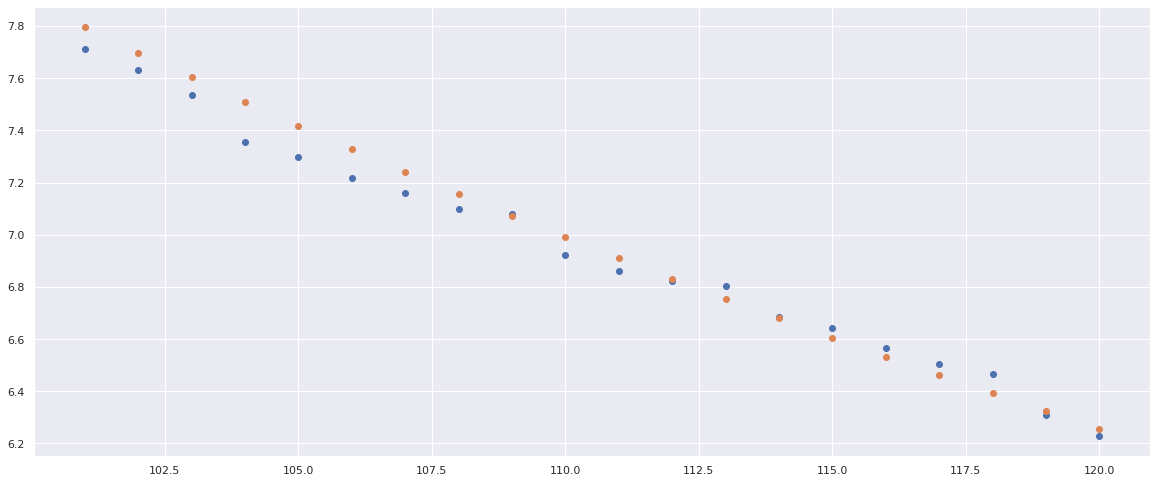

In [44]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, predictions)

In [45]:
from sklearn.metrics import mean_absolute_percentage_error

In [46]:
mean_absolute_percentage_error(y_test, predictions)

0.008221463671075565

#### Чтобы у проверяющих не дай бог не создалось впечатления, что я кроме линейной регрессии и о трюках с признаками ничего не слышал, попытаюсь объяснить, почему другие модели из классического ml не подходят

#### Классическое ml в моей картине мира делится на две части: линейные модели и деревяшки или их ансамбли. Деревья нельзя использовать, т.к. мы прогнозируем ответ на объектах, значения признака которых не входят в отрезок значений признака объектов, участвующих в обучении, т.е. мы экстраполируем неизвестную зависимость. Из алгоритма построения дерева ясно, что это плохо, т.к. вне отрезка разбиение закончится и там будет выдаваться константный прогноз. По тем же причинам нельзя использовать беггинг и бустинг.

#### Ну а регуляризацию я не проводил, т.к. переобучением тут явно не пахнет.

#### Возможно,  сетки смогли бы дать результат, но я на данный момент ими не владею :(

#### Проверку на адекватность проходит, буду использовать эту модель(за кадром попробовал приблизить логарифмом, но вышло хуже

#### Теперь обучу эту же модель, но уже на всей второй половине данных, и сделаю предсказания

In [47]:
x = np.array(data_A.level_number)[60:]
y = np.array(data_A.unique_a / 5057 * 100)[60:]
x_log = np.log(x).reshape(-1, 1)
y_log = np.log(y)
model = LinearRegression().fit(x_log, y_log)

In [48]:
new_levels_log = np.log(np.array([240, 360, 480, 600]).reshape(-1, 1))
predictions_new = np.exp(model.predict(new_levels_log))
predictions_new

array([2.56494974, 1.52529666, 1.05487308, 0.79245577])

### 2.2 Сколько в среднем уровней на данный момент приходится на пользователя? Спрогнозирую, сколько уровней приходилось бы на пользователя в среднем, если бы в игре было 240,360,480,600 уровней

In [49]:
data_A 

,segment,level_number,unique_a,totals_a,totals_b,totals_c,totals_d,time,churn_rate
0,Cohort A,1,5057,5131,4902,0,464,180,6.58
1,Cohort A,2,4724,4759,4600,12,147,180,7.64
2,Cohort A,3,4363,4464,4175,72,223,205,10.04
3,Cohort A,4,3925,4011,3851,58,189,250,8.54
4,Cohort A,5,3590,3739,3480,106,277,210,7.10
...,...,...,...,...,...,...,...,...,...
115,Cohort A,116,332,429,332,89,31,274,0.90
116,Cohort A,117,329,628,329,274,83,300,0.61
117,Cohort A,118,327,654,327,296,95,317,2.45
118,Cohort A,119,319,754,318,401,100,273,1.25


#### Посчитаем, сколько уникальных игроков стартовали ровно 1 уровень, ровно 2 уровня, ... , ровно 120 уровней

In [50]:
def level_players(unique):
    players = np.zeros(120)
    for i in range(119):
        players[i] = unique[i] - unique[i+1]
    players[119] = unique[119]
    return players

#### Перемножаем количества этих игроков на количество уровней, которые они прошли, все это суммируем и делим на общее количество людей

In [51]:
def calculate_lifetime(players, number_of_levels):
    lifetime = (players * np.arange(1, number_of_levels+1)).sum() / 5057
    return lifetime

In [52]:
players120 = level_players(np.array(data_A['unique_a']))
lifetime120 = calculate_lifetime(players120, 120)

In [53]:
lifetime120

25.716828158987543

In [54]:
levels_240 = np.arange(121, 241)
levels_360 = np.arange(121, 361)
levels_480 = np.arange(121, 481)
levels_600 = np.arange(121, 601)

#### Получим прогнозы количества уникальных пользователей на новых уровнях и склеим с количеством пользователей на старых

In [55]:
def predict_and_concat(levels):
    percent = np.exp(model.predict(np.log(levels.reshape(-1, 1))))
    unique = percent * 5057 // 100
    return np.concatenate((np.array(data_A.unique_a), unique))

#### Посчитаем, сколько уникальных игроков стартовали ровно 1 уровень, ровно 2 уровня, ... , ровно number_of_levels уровней

In [56]:
def level_players(unique, number_of_levels):
    players = np.zeros(number_of_levels)
    for i in range(number_of_levels-1):
        players[i] = unique[i] - unique[i+1]
    players[number_of_levels-1] = unique[number_of_levels-1]
    return players

In [57]:
unique_240 = predict_and_concat(levels_240)
unique_360 = predict_and_concat(levels_360)
unique_480 = predict_and_concat(levels_480)
unique_600 = predict_and_concat(levels_600)

In [58]:
players_240 = level_players(unique_240, 240)
players_360 = level_players(unique_360, 360)
players_480 = level_players(unique_480, 480)
players_600 = level_players(unique_600, 600)

In [59]:
lifetime_240 = calculate_lifetime(players_240, 240)
lifetime_360 = calculate_lifetime(players_360, 360)
lifetime_480 = calculate_lifetime(players_480, 480)
lifetime_600 = calculate_lifetime(players_600, 600)

In [60]:
lifetime_240

30.398062092149495

In [61]:
lifetime_360

32.73937116867708

In [62]:
lifetime_480

34.242040735614

In [63]:
lifetime_600

35.32390745501285